In [4]:
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
!pip install ipywidgets
!pip install mpl_toolkits
!pip install warnings

ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits
ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import numpy as np
import pandas as pd

In [7]:
df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
df.shape

(53940, 11)

In [9]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [11]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [12]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [13]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

#### About dataset - 
    1. Price in USD

    2. Carat (weight of the diamond) 

    3. cut (quality of the cut) - Fair, Good, Very Good, Premium, Ideal

    4. Color (diamond colour) -  from J (worst) to D (best)

    5. Clarity (measurement of how clear the diamond) - I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

    6. x length in mm (0--10.74)

    7. y width in mm (0--58.90)

    8. z depth in mm (0--31.80)

    9. depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) --> [43.00 to 79.00]

    10. table width of top of diamond relative to widest point --> [43.00 to 95.00]

In [14]:
# Data Cleaning
df.isnull().sum(axis = 0)

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>,
        <Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>],
       [<Axes: title={'center': 'y'}>, <Axes: title={'center': 'z'}>,
        <Axes: >]], dtype=object)

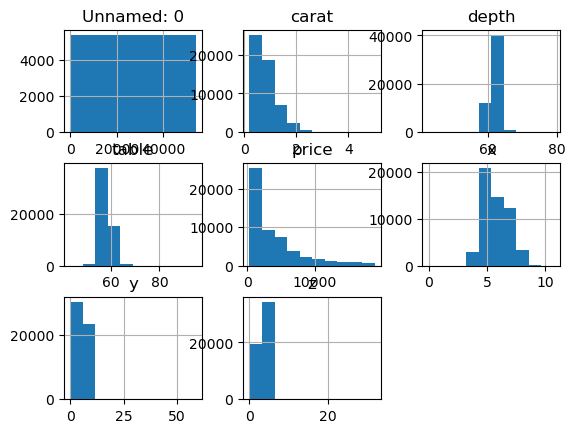

In [15]:
df.hist()

In [19]:
import pandas as pd
# Assuming you have a DataFrame named df
# Drop non-numeric columns
numeric_df = df.select_dtypes(include=['number'])
# Compute the correlation matrix
corr = numeric_df.corr()
# Apply background gradient to the correlation matrix
corr.style.background_gradient()

,Unnamed: 0,carat,depth,table,price,x,y,z
Unnamed: 0,1.000000,-0.377983,-0.034800,-0.100830,-0.306873,-0.405440,-0.395843,-0.399208
carat,-0.377983,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,-0.034800,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.100830,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.306873,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.405440,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.395843,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,-0.399208,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


</p> The above, correlation plot shows that carat and price are in strong positive correlation. </br> Also, dimensions x, y, z of a diamond are also strongly positive coorelated with it's carat value (weight of diamond) </p>

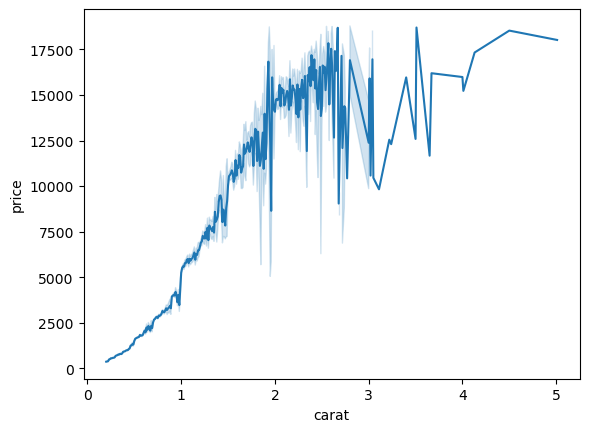

<Figure size 3000x1000 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.lineplot(x="carat", y="price", data=df)
plt.figure(figsize = (30, 10))
plt.show()
#plt.savefig('pricevscarat0.png')

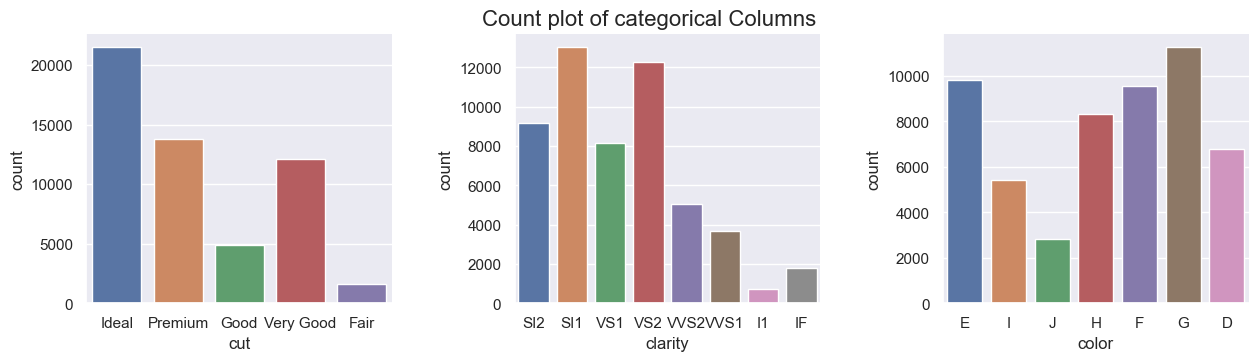

In [21]:
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set()

fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 3.5))

fig.suptitle('Count plot of categorical Columns', y = 0.95, fontsize = 16)
plt.subplots_adjust(hspace = 0.4, wspace = 0.4)

for pos, name in enumerate(['cut', 'clarity', 'color']):
    sns.countplot(data = df, x = name, ax = axes.flat[pos]);
plt.savefig('countplotofcategorical.png')
sns.despine()

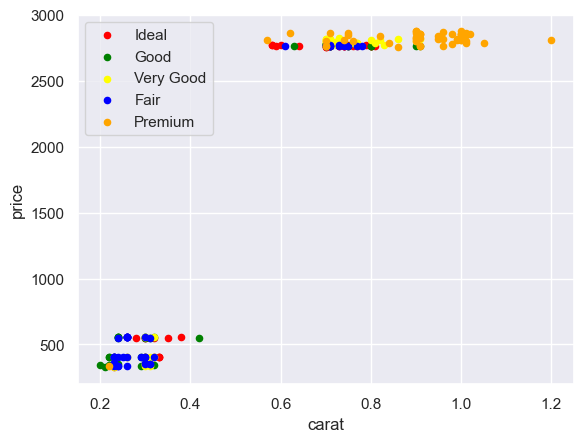

In [22]:
#'Ideal', 'Premium', 'Good', 'Very Good', 'Fair'
ax = df[df['cut'] == 'Ideal'][0:50].plot(kind='scatter', x='carat', y='price', color='Red', label='Ideal');
df[df['cut'] == 'Premium'][0:50].plot(kind='scatter', x='carat', y='price', color='Green', label='Good', ax=ax);
df[df['cut'] == 'Good'][0:50].plot(kind='scatter', x='carat', y='price', color='yellow', label='Very Good', ax=ax);
df[df['cut'] == 'Very Good'][0:50].plot(kind='scatter', x='carat', y='price', color='blue', label='Fair', ax=ax);
df[df['cut'] == 'Fair'][0:50].plot(kind='scatter', x='carat', y='price', color='orange', label='Premium', ax=ax);
plt.show()
#plt.savefig('caratvsprice.png')

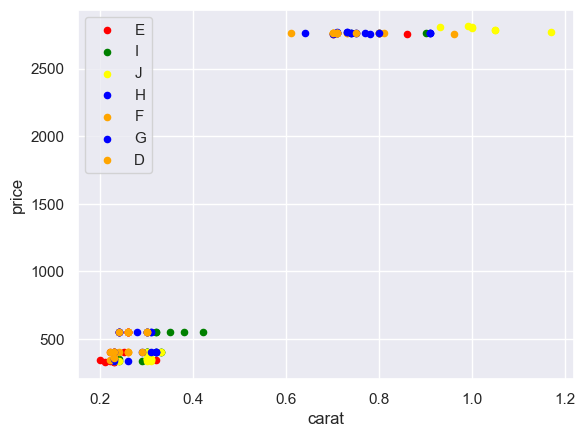

In [23]:
# 'E', 'I', 'J', 'H', 'F', 'G', 'D'
ax = df[df['color'] == 'E'][0:20].plot(kind='scatter', x='carat', y='price', color='Red', label='E');
df[df['color'] == 'I'][0:20].plot(kind='scatter', x='carat', y='price', color='Green', label='I', ax=ax);
df[df['color'] == 'J'][0:20].plot(kind='scatter', x='carat', y='price', color='yellow', label='J', ax=ax);
df[df['color'] == 'H'][0:20].plot(kind='scatter', x='carat', y='price', color='blue', label='H', ax=ax);
df[df['color'] == 'F'][0:20].plot(kind='scatter', x='carat', y='price', color='orange', label='F', ax=ax);
df[df['color'] == 'G'][0:20].plot(kind='scatter', x='carat', y='price', color='blue', label='G', ax=ax);
df[df['color'] == 'D'][0:20].plot(kind='scatter', x='carat', y='price', color='orange', label='D', ax=ax);
plt.show()
#plt.savefig('cutscatter.png')

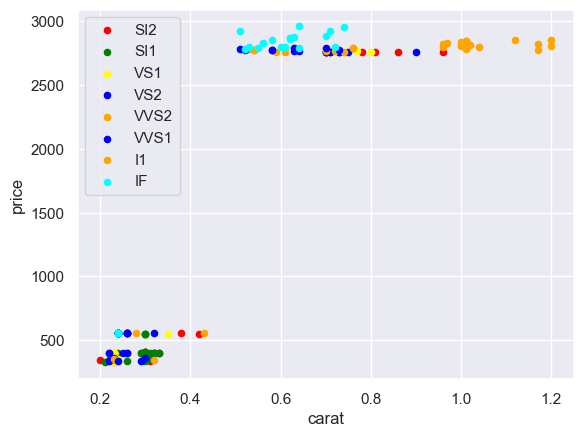

In [24]:
#'SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'
ax = df[df['clarity'] == 'SI2'][0:20].plot(kind='scatter', x='carat', y='price', color='Red', label='SI2');
df[df['clarity'] == 'SI1'][0:20].plot(kind='scatter', x='carat', y='price', color='Green', label='SI1', ax=ax);
df[df['clarity'] == 'VS1'][0:20].plot(kind='scatter', x='carat', y='price', color='yellow', label='VS1', ax=ax);
df[df['clarity'] == 'VS2'][0:20].plot(kind='scatter', x='carat', y='price', color='blue', label='VS2', ax=ax);
df[df['clarity'] == 'VVS2'][0:20].plot(kind='scatter', x='carat', y='price', color='orange', label='VVS2', ax=ax);
df[df['clarity'] == 'VVS1'][0:20].plot(kind='scatter', x='carat', y='price', color='blue', label='VVS1', ax=ax);
df[df['clarity'] == 'I1'][0:20].plot(kind='scatter', x='carat', y='price', color='orange', label='I1', ax=ax);
df[df['clarity'] == 'IF'][0:20].plot(kind='scatter', x='carat', y='price', color='cyan', label='IF', ax=ax);
plt.show()
#plt.savefig('clarityscatter.png')

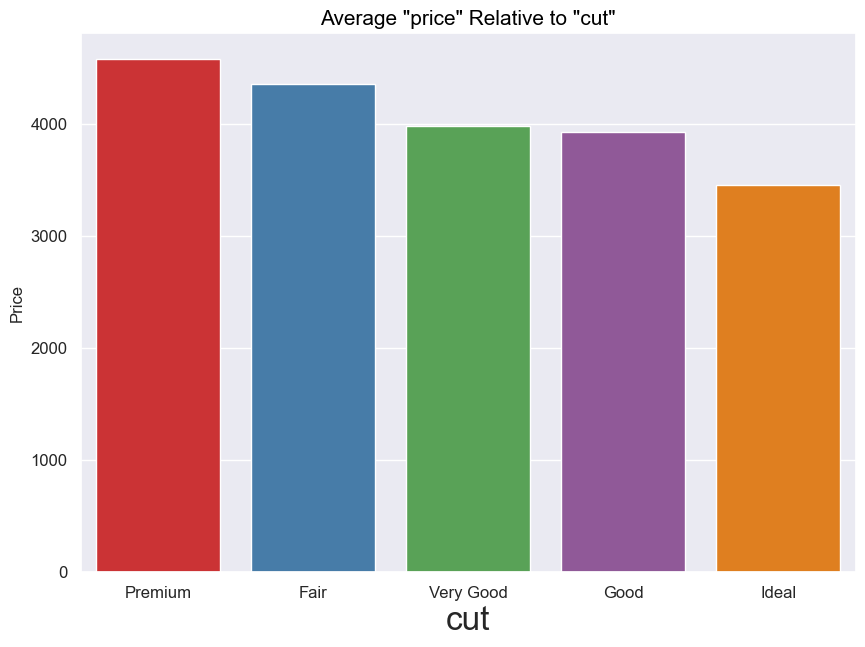

In [25]:
mean_price_by_cut = df[["cut","price"]].groupby(["cut"], as_index = False).mean().sort_values(by="price",ascending = False)
plt.figure(figsize=(10,7))
sns.barplot(x = mean_price_by_cut['cut'], y = mean_price_by_cut['price'], palette="Set1")

plt.ylabel('Price')
plt.xlabel('cut', style = 'normal', size = 24)

plt.xticks(rotation = 0, size = 12)
plt.yticks(rotation = 0, size = 12)

plt.title('Average "price" Relative to "cut"',color = 'black',fontsize=15)
plt.show()
#plt.savefig('avg price cut.png')

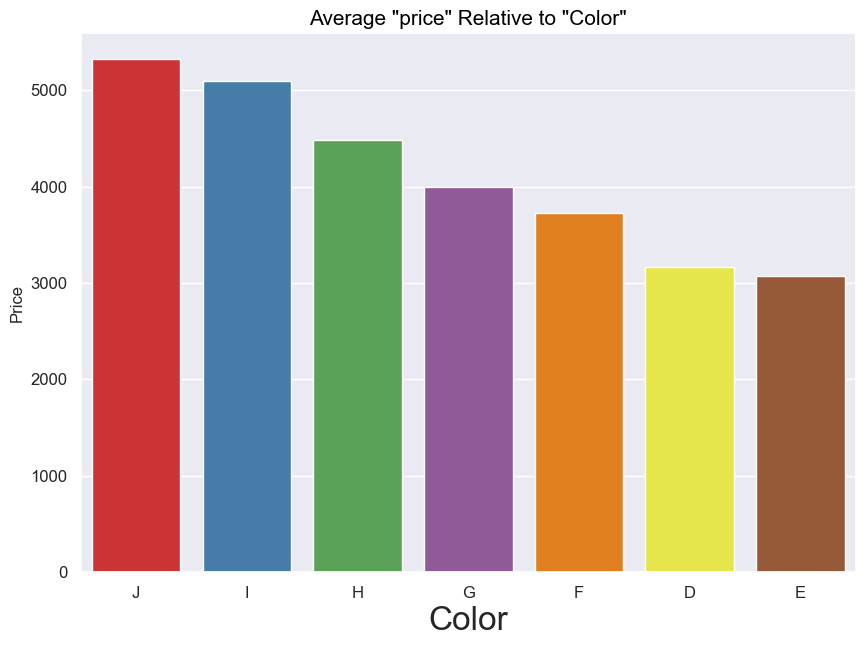

In [26]:
mean_price_by_cut = df[["color","price"]].groupby(["color"], as_index = False).mean().sort_values(by="price",ascending = False)
plt.figure(figsize=(10,7))
sns.barplot(x = mean_price_by_cut['color'], y = mean_price_by_cut['price'], palette="Set1")

plt.ylabel('Price')
plt.xlabel('Color', style = 'normal', size = 24)

plt.xticks(rotation = 0, size = 12)
plt.yticks(rotation = 0, size = 12)

plt.title('Average "price" Relative to "Color"',color = 'black',fontsize=15)
plt.show()
#plt.savefig('avg price color.png')

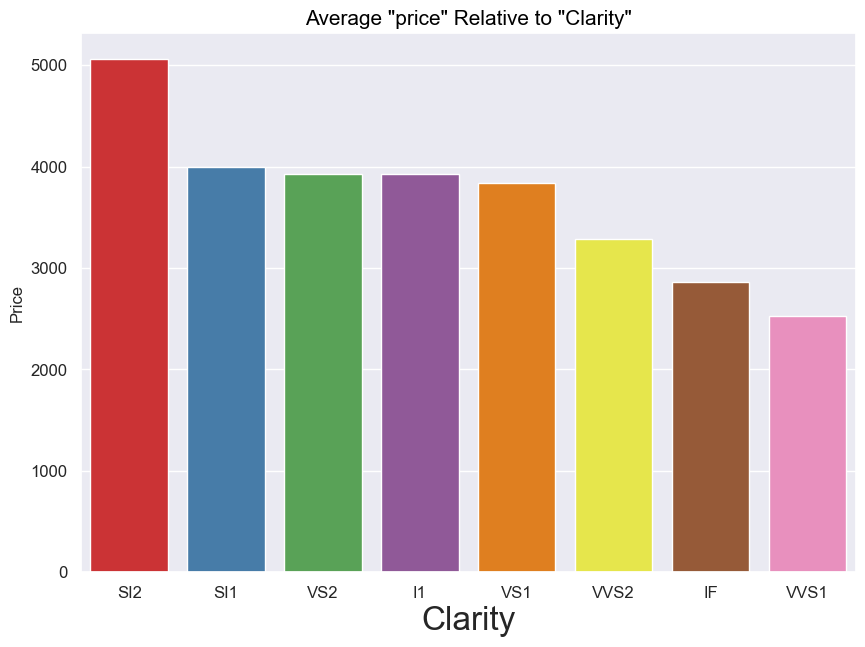

In [27]:
mean_price_by_cut = df[["clarity","price"]].groupby(["clarity"], as_index = False).mean().sort_values(by="price",ascending = False)
plt.figure(figsize=(10,7))
sns.barplot(x = mean_price_by_cut['clarity'], y = mean_price_by_cut['price'], palette="Set1")

plt.ylabel('Price')
plt.xlabel('Clarity', style = 'normal', size = 24)

plt.xticks(rotation = 0, size = 12)
plt.yticks(rotation = 0, size = 12)

plt.title('Average "price" Relative to "Clarity"',color = 'black',fontsize=15)
plt.show()
#plt.savefig('avg price clarity.png')

In [28]:
# Encode the categorical data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df.cut = le.fit_transform(df.cut)

df.color = le.fit_transform(df.color)

df.clarity = le.fit_transform(df.clarity)


In [29]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  int32  
 3   color       53940 non-null  int32  
 4   clarity     53940 non-null  int32  
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int32(3), int64(2)
memory usage: 3.9 MB


In [31]:
# Outlier Treatment
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    return multiple_outliers

df.loc[detect_outliers(df, ['carat', 'depth', 'table', 'x', 'y', 'z', 'price'])]


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
13992,13993,2.01,0,5,0,55.9,64.0,5696,8.48,8.39,4.71
17196,17197,2.72,0,6,0,68.2,56.0,6870,8.46,8.43,5.76
18067,18068,2.01,0,2,0,58.7,66.0,7294,8.30,8.19,4.84
19346,19347,3.00,0,4,0,67.1,57.0,8044,8.93,8.84,5.97
21758,21759,3.11,0,6,0,65.9,57.0,9823,9.15,9.02,5.98
...,...,...,...,...,...,...,...,...,...,...,...
24520,24521,1.56,2,3,5,62.2,54.0,12800,0.00,0.00,0.00
26243,26244,1.20,3,0,6,62.1,59.0,15686,0.00,0.00,0.00
49556,49557,0.71,1,2,3,64.1,60.0,2130,0.00,0.00,0.00
49557,49558,0.71,1,2,3,64.1,60.0,2130,0.00,0.00,0.00


In [32]:
df = df.drop(detect_outliers(df,['carat', 'depth', 'table', 'x', 'y', 'z', 'price']),axis = 0).reset_index(drop = True)

In [33]:
df.shape

(53756, 11)

In [34]:
### Feature Selection

X = df.drop(['Unnamed: 0', 'price'], axis = 1)
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75


In [35]:
y  = df['price']
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [36]:
# Standardise data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.20987889, -0.54357024, -0.93540921, ..., -1.59736211,
        -1.57597437, -1.58199124],
       [-1.2528774 ,  0.43277839, -0.93540921, ..., -1.65142636,
        -1.70238818, -1.75391783],
       [-1.20987889, -1.51991886, -0.93540921, ..., -1.50725502,
        -1.49470834, -1.75391783],
       ...,
       [-0.19941401,  1.40912701, -1.52375846, ..., -0.05653098,
        -0.04094947,  0.03698408],
       [ 0.14457404,  0.43277839,  0.82963856, ...,  0.38499373,
         0.35635109,  0.29487395],
       [-0.09191774, -0.54357024, -1.52375846, ...,  0.09665106,
         0.13061213,  0.1516018 ]])

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'cut'}>,
        <Axes: title={'center': 'color'}>],
       [<Axes: title={'center': 'clarity'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>,
        <Axes: title={'center': 'z'}>]], dtype=object)

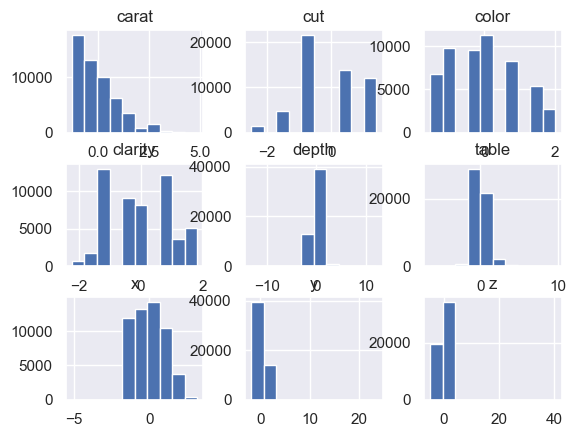

In [37]:
df_temp = pd.DataFrame(X, columns = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'])
df_temp.hist()

### PCA

In [50]:
# Train Test Split
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=42)

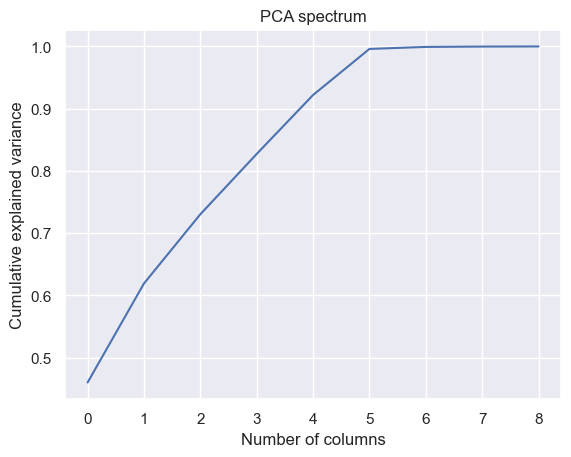

In [39]:
from sklearn.decomposition import PCA
pca=PCA(n_components=9)
pca.fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("PCA spectrum")
plt.xlabel("Number of columns")
plt.ylabel("Cumulative explained variance")
plt.savefig('pca spectrum.png')

In [40]:
pca_tx=PCA(n_components=3, random_state = 0)
X_pca_train=pca_tx.fit_transform(X_train)
y_pca_train=y_train

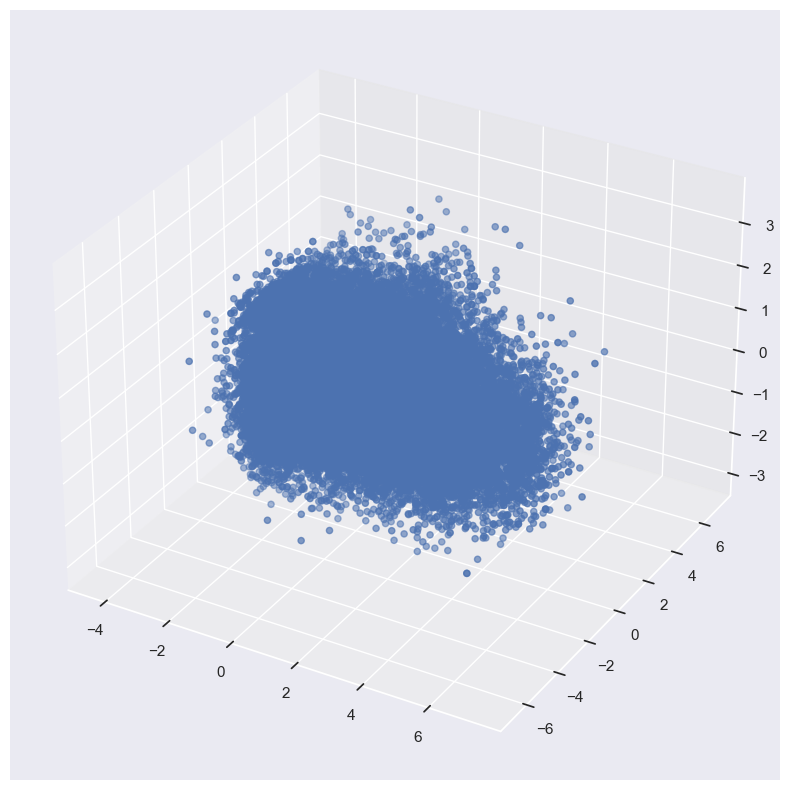

In [41]:
from ipywidgets import interact, fixed
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
xs=X_pca_train[:,0]
ys=X_pca_train[:,1]
zs = X_pca_train[:,2]
ax.scatter(xs, ys, zs)
plt.savefig('pca3d.png')

### Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression().fit(X_pca_train, y_pca_train)

In [43]:
# PCA on testing data
pca_tx = PCA(n_components=3, random_state = 101)
X_pca_test = pca_tx.fit_transform(X_test)

In [44]:
pred_linear_pca = lin_reg.predict(X_pca_test)
pred_linear_pca

array([ 6267.25777377,  8099.74675313, 10613.43353871, ...,
       12284.301778  ,  4898.77896772,  5749.43759908])

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [58]:
print('Mean Absolute Error: ', mean_absolute_error(pred_linear_pca, y_test))
print('Mean Squared Error: ', mean_squared_error(pred_linear_pca, y_test))
print('R2 Score: ', r2_score(pred_linear_pca, y_test))

Mean Absolute Error:  0.09999999999999998
Mean Squared Error:  0.009999999999999995
R2 Score:  -0.5


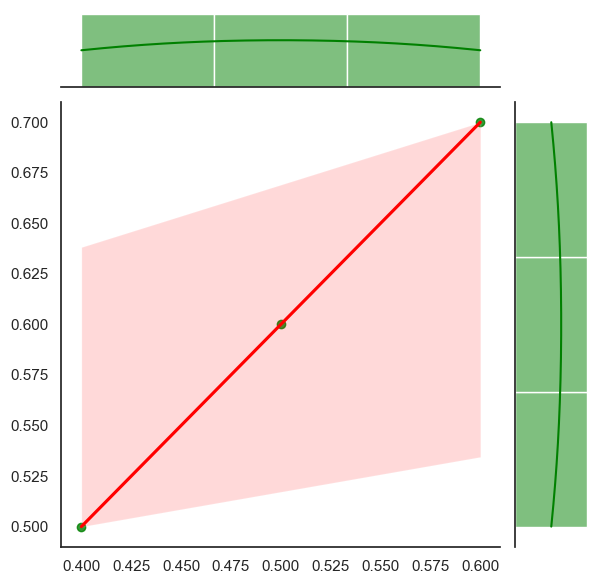

In [59]:
sns.set_theme(style="white")
sns.jointplot(x=y_test[0:500], y=pred_linear_pca[0:500], kind='reg', color = 'green',line_kws={"color": "red"})
plt.savefig('linearreg.png')

### Random Forest Regressor

In [60]:
from sklearn.ensemble import RandomForestRegressor
reg_RF = RandomForestRegressor(n_estimators = 100, random_state = 42)
reg_RF.fit(X_pca_train, y_pca_train)  

RandomForestRegressor(random_state=42)

In [61]:
pred_RF = reg_RF.predict(X_pca_test) 
pred_RF

array([ 7207.78      , 10400.82      , 12549.49      , ...,
       13585.05      ,  4160.57857143,  4931.92      ])

In [62]:
print('Mean Ablosute Error: ', mean_absolute_error(pred_RF, y_test))
print('Mean Square Error: ', mean_squared_error(pred_RF, y_test))
print('R2 Score: ', r2_score(pred_RF, y_test))

ValueError: Found input variables with inconsistent numbers of samples: [13439, 3]

In [ ]:
sns.set_theme(style="white")
sns.jointplot(x=y_test[0:500], y=pred_RF[0:500], kind='reg', color = 'green',line_kws={"color": "red"})
plt.savefig('RFreg.png')

### KNN Regressor


In [ ]:
from math import sqrt
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = KNeighborsRegressor(n_neighbors = K)

    model.fit(X_pca_train, y_pca_train)  #fit the model
    pred=model.predict(X_pca_test) #make prediction on test set
    #error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    error = r2_score(y_test,pred)
    rmse_val.append(error) #store rmse values
    #print('RMSE value for k= ' , K , 'is:', error)
    print('R2 Score value for k= ' , K , 'is:', error)

In [ ]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn =  KNeighborsRegressor(n_neighbors=10)
knn.fit(X_pca_train, y_pca_train)

In [ ]:
pred_knn= knn.predict(X_pca_test)
pred_knn 

In [46]:
print('Mean Ablosute Error: ', mean_absolute_error(pred_knn, y_test))
print('Mean Square Error: ', mean_squared_error(pred_knn, y_test))
print('R2 Score: ', r2_score(pred_knn, y_test))

NameError: name 'mean_absolute_error' is not defined

In [47]:
sns.set_theme(style="white")
sns.jointplot(x=y_test[0:500], y=pred_knn[0:500], kind='reg', color = 'green',line_kws={"color": "red"})
plt.savefig('knnreg.png')

NameError: name 'pred_knn' is not defined

### Comparision of all models

In [48]:

score = {'KNN': r2_score(pred_knn, y_test), 'Random Forest': r2_score(pred_RF, y_test), 'Linear Regression': r2_score(pred_linear_pca, y_test)}

plt.bar(list(score.keys()), list(score.values()), color ='maroon', width = 0.3)
plt.ylim(0.5, 0.9)
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.title("R2 Score Comparision")
plt.show()

NameError: name 'r2_score' is not defined